## Relationship Between GDP and CO2 emission

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

In [2]:
data = pd.read_csv('./world_development_indicators/Indicators.csv')

In [3]:
# Find GDP per capita
hist_indic = 'GDP per capita \(constant 2005'
hist_country='USA'

mask1=data['IndicatorName'].str.contains(hist_indic)
mask2=data['CountryCode'].str.contains(hist_country)

gdp_stage=data[mask1&mask2]

In [4]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [5]:
# Find CO2 emission per capita
indi = 'CO2 emissions \(metric'
hist_ctry = 'USA'

mask3=data['IndicatorName'].str.contains(indi)
mask4=data['CountryCode'].str.contains(hist_ctry)

stage=data[mask3 & mask4]

In [6]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


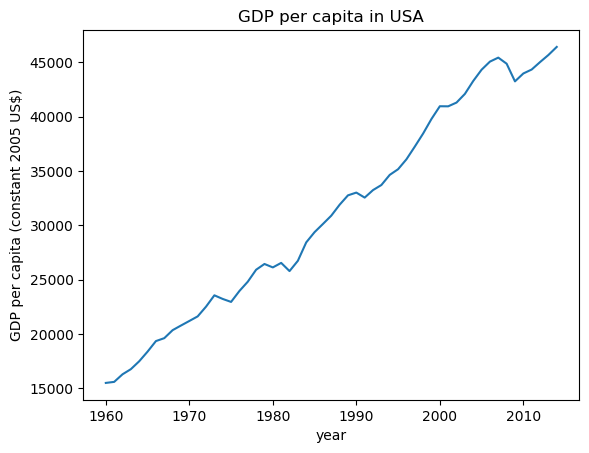

In [7]:
# Plot gdp per capita in usa
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

plt.title('GDP per capita in USA')
plt.xlabel('year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
#plt.axis([1959,2015,0,50000])
plt.show()

## Scatter plot for comparing GDP against CO2 emissions (per capita)
First we need to make sure we're looking for the same time frames

In [8]:
print('GDP values from',gdp_stage['Year'].min(),'to',gdp_stage['Year'].max())
print('CO2 emission values from',stage['Year'].min(),'to',stage['Year'].max())
print('Number of years for GDP',len(gdp_stage['Year']))
print('Number of years for CO2 emissions',len(stage['Year']))

GDP values from 1960 to 2014
CO2 emission values from 1960 to 2011
Number of years for GDP 55
Number of years for CO2 emissions 52


There are 3 extra years of GDP data. so, let's trim these off so the scatter plot have equal array to compare.

In [9]:
gdp_stage_trim = gdp_stage[gdp_stage['Year']<2012]

print(len(gdp_stage_trim['Year']))

print(len(stage['Year']))
gdp_stage_trim.head(1)

52
52


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.70776


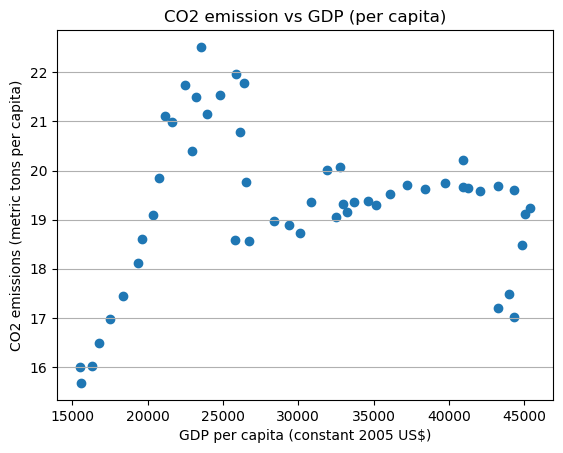

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

fig, ax = plt.subplots()

ax.yaxis.grid(True)
ax.set_title('CO2 emission vs GDP (per capita)') 
ax.set_xlabel(gdp_stage_trim['IndicatorName'].iloc[0])
ax.set_ylabel(stage['IndicatorName'].iloc[0])

x = gdp_stage_trim['Value'].values
y = stage['Value'].values

ax.scatter(x,y)

plt.show()


This doesn't like a strong relationship

In [11]:
# To find the correlation
np.corrcoef(gdp_stage_trim['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])